# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime
import functools as ft

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 12, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

import warnings
warnings.filterwarnings('ignore')

# Loading Dataframes

In [3]:
Jinte = pd.read_csv('./datasets/Jinte.csv') 
Alice = pd.read_csv('./datasets/Alice.csv') 
Vicky = pd.read_csv('./datasets/Vicky.csv') 
Aniek = pd.read_csv('./datasets/Aniek.csv') 
Fransje = pd.read_csv('./datasets/Fransje.csv') 

Jinte.head()

,Date/Time,I:Temperature,D:Heartrate
0,2022-05-19 01:00:00,24.8,62.0
1,2022-05-19 01:01:00,24.8,62.0
2,2022-05-19 01:02:00,24.8,62.0
3,2022-05-19 01:03:00,24.7,60.0
4,2022-05-19 01:04:00,24.8,61.0


# Merging and Gouping Dataframes

In [4]:
Jinte['Sample'] = pd.Series([1 for x in range(len(Jinte.index))])
Alice['Sample'] = pd.Series([2 for x in range(len(Alice.index))])
Vicky['Sample'] = pd.Series([3 for x in range(len(Vicky.index))])
Aniek['Sample'] = pd.Series([4 for x in range(len(Aniek.index))])
Fransje['Sample'] = pd.Series([5 for x in range(len(Fransje.index))])

data_frames = [Jinte, Vicky, Fransje, Aniek] 

df_merged = pd.concat(data_frames)

# Creating graph

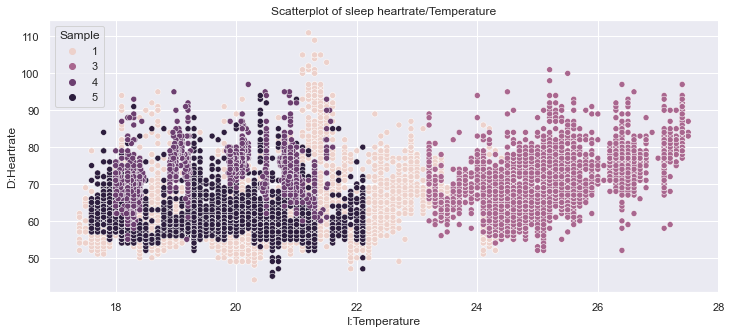

In [68]:
ax = sns.scatterplot(data=df_merged, x='I:Temperature', y='D:Heartrate', hue='Sample')
ax.set(title='Scatterplot of sleep heartrate/Temperature')
plt.savefig('./figures/final/final.svg')
plt.savefig('./figures/final/final.png')

# Creating individual sample graphs

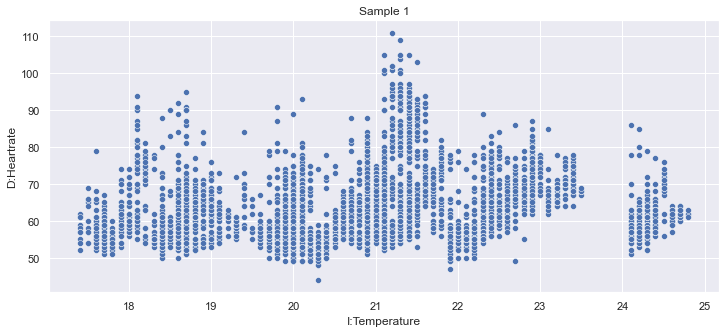

In [6]:
ax1 = sns.scatterplot(data=Jinte, x='I:Temperature', y='D:Heartrate').set(title='Sample 1')
plt.savefig('./figures/Sample1.svg')
plt.savefig('./figures/Sample1.png')

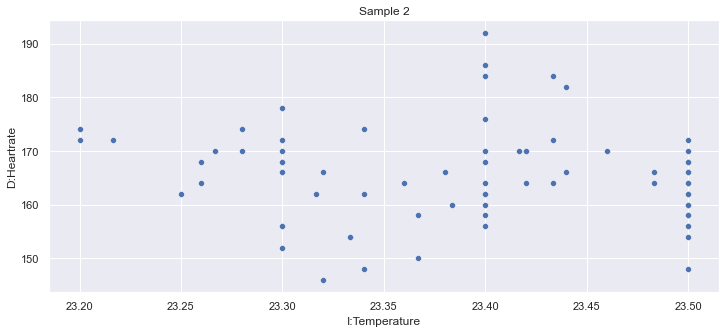

In [7]:
ax2 = sns.scatterplot(data=Alice, x='I:Temperature', y='D:Heartrate').set(title='Sample 2')
plt.savefig('./figures/Sample2.svg')
plt.savefig('./figures/Sample2.png')

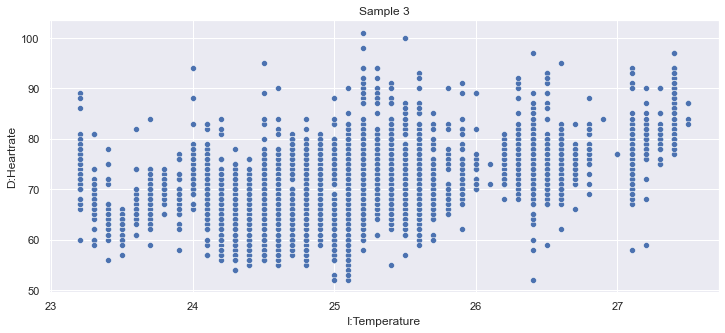

In [8]:
ax3 = sns.scatterplot(data=Vicky, x='I:Temperature', y='D:Heartrate').set(title='Sample 3')
plt.savefig('./figures/Sample3.svg')
plt.savefig('./figures/Sample3.png')

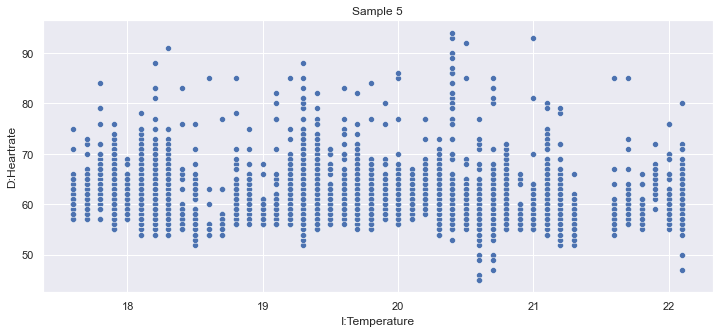

In [9]:
ax5 = sns.scatterplot(data=Fransje, x='I:Temperature', y='D:Heartrate').set(title='Sample 5')
plt.savefig('./figures/Sample5.svg')
plt.savefig('./figures/Sample5.png')

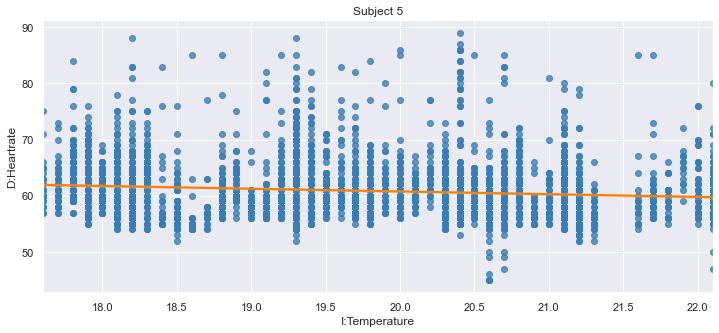

In [66]:
cut=Fransje[Fransje["D:Heartrate"]<90]
ax4 = sns.regplot(x="I:Temperature", y="D:Heartrate", data=cut, scatter_kws={"color": "#377eb8"}, line_kws={"color": "#ff7f00"})
ax4.set(title='Subject 5')
plt.savefig('./figures/final/sample 5.svg')
plt.savefig('./figures/final/sample 5.png')

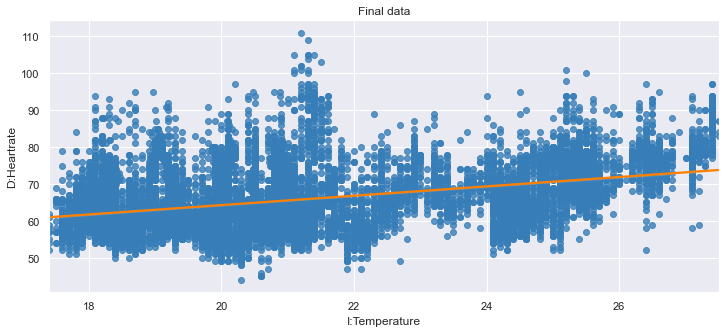

In [11]:
axfinal=sns.regplot(x="I:Temperature", y="D:Heartrate", data=df_merged, scatter_kws={"color": "#377eb8"}, line_kws={"color": "#ff7f00"})
axfinal.set(title='Final data')
plt.savefig('./figures/newfinal.svg')
plt.savefig('./figures/newfinal.png')

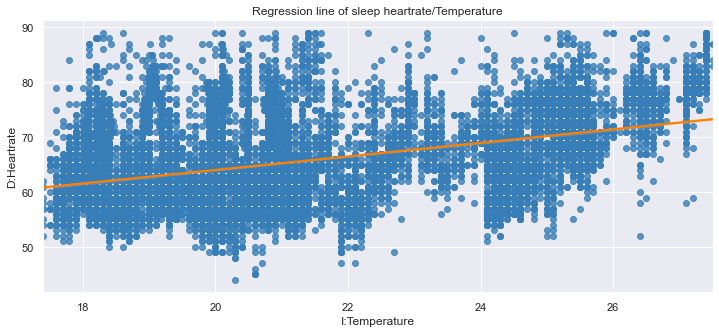

In [69]:
extrafiltered=df_merged[df_merged["D:Heartrate"]<90]
axcut=sns.regplot(x="I:Temperature", y="D:Heartrate", data=extrafiltered, scatter_kws={"color": "#377eb8"}, line_kws={"color": "#ff7f00"})
axcut.set(title='Regression line of sleep heartrate/Temperature')
plt.savefig('./figures/final/regression.svg')
plt.savefig('./figures/final/regression.png')

In [36]:
df_mean=extrafiltered.groupby(by="I:Temperature").mean()
df_mean.head()
# axmean=sns.lineplot(x="I:Temperature", y="D:Heartrate", data=df_mean)
# axmean.set(title='mean and cut off 80bpm')
# plt.savefig('./figures/mean80bpm.svg')
# plt.savefig('./figures/mean80bpm.png')

,D:Heartrate,Sample,I:Humidity
I:Temperature,,,
17.4,57.600000,1.000000,NaN
17.5,62.058824,1.000000,NaN
17.6,60.197183,2.690141,NaN
17.7,59.946237,2.978495,NaN
17.8,62.914729,4.410853,NaN


In [38]:
df_groupheart=extrafiltered.groupby(by="I:Temperature")
df_groupheart.head()
dlong = extrafiltered.melt(var_name='feature', value_name='value')
dlong['bins'] = pd.cut(dlong['I:Temperature'], 20)
sns.boxplot(data=dlong, x='bins', y='D:Heartrate', hue='feature', ax=ax)


KeyError: 'I:Temperature'

In [59]:
bins=np.arange(17, 30, 1) 
df=extrafiltered
df['bins'] = pd.cut(extrafiltered['I:Temperature'], bins=bins)
sns.boxplot(data=df, x='bins', y='D:Heartrate')
# df.head()

TypeError: '<' not supported between instances of 'int' and 'pandas._libs.interval.Interval'